# Imports

In [1]:
from datetime import timedelta
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

from icedef import iceberg, metocean, drift_simulation
from icedef.turnbull import drift

# Iceberg

In [2]:
iip_season = 2015
max_hours = 24

#iip_df = iceberg.get_dense_df(iip_season, max_hours)
iip_df = pd.read_csv(f'csvs/{iip_season}_max{max_hours}hr_tracks')
iip_df = iip_df.drop('Unnamed: 0', axis=1)
iip_df['TIMESTAMP'] = pd.to_datetime(iip_df['TIMESTAMP'])

track_num = 0
iip_berg_df = iip_df.loc[iip_df['track_num'] == track_num]

iip_berg = iceberg.get_iip_berg(iip_berg_df)

# Metocean

In [3]:
ocean_data = metocean.ECMWFOcean(iip_berg.history['T'][0], iip_berg.history['T'][-1])

ocean_data.filenames

['20150310.nc', '20150311.nc']

In [4]:
atm_data = metocean.ECMWFAtm(iip_berg.history['T'][0], iip_berg.history['T'][-1])

atm_data.filenames

['20150310.nc', '20150311.nc']

# Drift Simulation

In [5]:
sim = drift_simulation.DriftSimulation(iip_berg, ocean_data, atm_data, drift)

In [6]:
sim.euler(0.1*3600, 100)
#sim.rk2(0.1*3600, 100)

# Plot

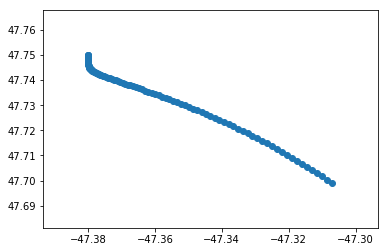

In [7]:
plt.scatter(sim.history['x'], sim.history['y'])
plt.show()

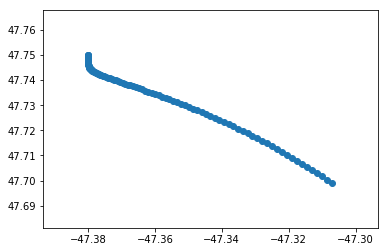

In [8]:
plt.scatter(sim.history['x'], sim.history['y'])
plt.show()

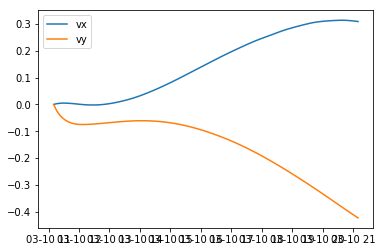

In [9]:
plt.plot(sim.history['t'], sim.history['vx'], label='vx')
plt.plot(sim.history['t'], sim.history['vy'], label='vy')
plt.legend()
plt.show()